In [560]:
import numpy as np
import matplotlib.pyplot as plt

Definimos algunas funciones que luego usaremos

In [561]:
# antes creamos algunos números x
x = np.linspace(-10, 10, 100)
x

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

<function matplotlib.pyplot.show(close=None, block=None)>

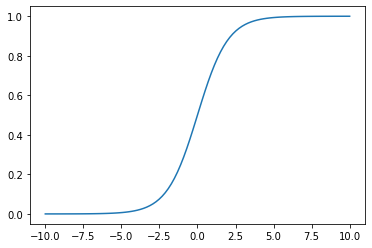

In [562]:
# funcion sigmoide
# le definimos la derivada porque la usaremos en el back-propagation
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

# mostramos la funcion
plt.plot(x, sigmoid(x))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

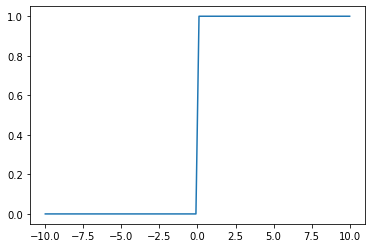

In [563]:
# funcion escalonada
def escalonada(p):
    return np.piecewise(p, [p<0.0, p>0.0], [0, 1])

# mostramos la funcion
plt.plot(x, escalonada(x))
plt.show

In [564]:
# funcion relu
def relu(x, derivada = False):
    if derivada:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:    
        return np.maximum(0,x)


# mostramos la funcion
plt.plot(x, relu(x))
plt.show

NameError: name 'derivate' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

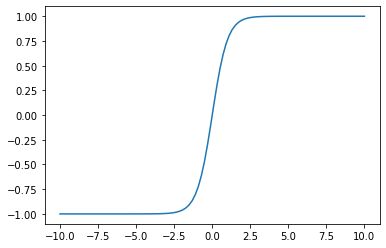

In [ ]:
# funcion tanh
# ya está en numpy
plt.plot(x, np.tanh(x))
plt.show

Ahora crearemos las funciones de pérdida

In [ ]:
# Ejemplo para comprobar
informado = np.array([0, 0, 1, 1]) 
prediccion = np.array([0.9, 0.5, 0.2, 0.0])

In [ ]:
#Funcion de pérdida MSE (Mean Square Error) 
# le vamos a definir las derivadas porque las usaremos en el back-propagation
def MSE(y, y_hat, derivada = False):
    if derivada:
        return (y-y_hat)
    else:
        return np.mean((y_hat-y)**2)
MSE(informado, prediccion)

0.675

CREAMOS LA RED NEURONAL

In [ ]:
# sirve para crear el dataset con el que trabajaremos 
from sklearn.datasets import make_gaussian_quantiles
import random

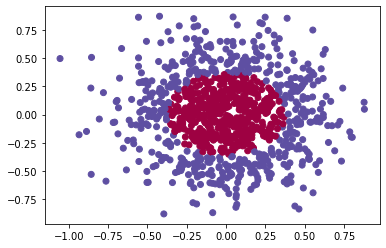

In [ ]:
N = 1000
X, Y = make_gaussian_quantiles(mean = None,
                                cov = 0.1,
                                n_samples = N, 
                                n_features = 2,
                                n_classes = 2,
                                shuffle = True,
                                random_state = None
)
Y = Y[:, np.newaxis]
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap = plt.cm.Spectral)
plt.show()


In [ ]:
# Tenemos que tener unos datos con los cuales comenzar, debemos tener unos pesos y unos bias, así que vamos a crearlos de forma aleatoria
def crear_parametros_aleatoriamente(dimensiones_capas):
    parametros = {}
    L = len(dimensiones_capas)
    for i in range(0, L-1): # le ponemos un -1 porque la última capa es una capa de salida, y no necesita pesos ni bias
        parametros['W'+str(i+1)] = np.random.rand(dimensiones_capas[i], dimensiones_capas[i+1])*2 -1 # creo los valores de los pesos de cada capa
        parametros['b'+str(i+1)] = np.random.rand(1, dimensiones_capas[i+1])*2 -1 # creo los valores de los bias
    return parametros

In [ ]:
capas = [2, 4, 8, 1]
parametros = crear_parametros_aleatoriamente(capas)
parametros

{'W1': array([[-0.53868279,  0.73964644,  0.41214393,  0.97921166],
        [-0.9454991 , -0.06326853, -0.90122701,  0.74036296]]),
 'b1': array([[ 0.16074581, -0.47360007,  0.32330813, -0.89427006]]),
 'W2': array([[-0.62405342,  0.07546628, -0.04582171, -0.02273511,  0.04047048,
         -0.55509261,  0.40445931,  0.21308682],
        [ 0.4996993 , -0.65492357,  0.88187717, -0.76215502,  0.60447342,
          0.42534155, -0.69563239, -0.38110236],
        [-0.45627014, -0.51288695,  0.09086464, -0.39534086, -0.67677855,
         -0.62336061,  0.44437871, -0.31720339],
        [-0.09076176,  0.10289141, -0.82210521,  0.95503624,  0.13601125,
          0.97178205,  0.04398648,  0.68762313]]),
 'b2': array([[ 0.07821761,  0.41621005, -0.70966718,  0.5963517 , -0.1690336 ,
          0.15065834,  0.10272564, -0.95008691]]),
 'W3': array([[-0.39946909],
        [ 0.53220552],
        [-0.45789953],
        [-0.69265661],
        [-0.31123578],
        [-0.19868567],
        [ 0.91022732],


In [ ]:
# con todos estos datos ya podemos avanzar por las capas (propagación forward) realizando el producto punto

def entrenamiento(X, learning_rate, parametros):
    # datos iniciales
    parametros['A0'] = X

    # primera capa
    parametros['Z1'] = parametros['A0']@parametros['W1'] + parametros['b1']
    parametros['A1'] = relu(parametros['Z1'])

    # segunda capa
    parametros['Z2'] = parametros['A1']@parametros['W2'] + parametros['b2']
    parametros['A2'] = relu(parametros['Z2'])

    # tercera capa
    parametros['Z3'] = parametros['A2']@parametros['W3'] + parametros['b3']
    parametros['A3'] = sigmoid(parametros['Z3'])

    output = parametros['A3']

    # ahora realizamos el Back-propagation
    parametros['dZ3'] = MSE(Y, output, True) * sigmoid(parametros['A3'], True)
    parametros['dW3'] = (parametros['A2'].T)@parametros['dZ3']

    parametros['dZ2'] = parametros['dZ3']@(parametros['W3'].T)*relu(parametros['A2'], True)
    parametros['dW2'] = (parametros['A1'].T)@parametros['dZ2']

    parametros['dZ1'] = parametros['dZ2']@(parametros['W2'].T)*relu(parametros['A1'], True)
    parametros['dW1'] = (parametros['A0'].T)@parametros['dZ1']

    # ahora realizamos el descenso del gradiante (usamos más o menos newton)
    parametros['W3'] = parametros['W3'] - parametros['dW3']*learning_rate
    parametros['b3'] = parametros['b3'] - (np.mean(parametros['dZ3'], axis =0, keepdims=True))*learning_rate

    parametros['W2'] = parametros['W2'] - parametros['dW2']*learning_rate
    parametros['b2'] = parametros['b2'] - (np.mean(parametros['dZ2'], axis =0, keepdims=True))*learning_rate

    parametros['W1'] = parametros['W1'] - parametros['dW1']*learning_rate
    parametros['b1'] = parametros['b1'] - (np.mean(parametros['dZ1'], axis =0, keepdims=True))*learning_rate

    return output

In [ ]:
# Con todo lo anterior realizamos el entrenamiento
DIMENSIONES = [2, 4, 8, 1]
PARAMS = crear_parametros_aleatoriamente(DIMENSIONES)
for i in range(10000):
    output = entrenamiento(X, 0.001, PARAMS)
    if i % 25 == 0:
        print(MSE(Y,output))

0.26208323241688347
0.4687561366729505
0.5003298560270525
0.5
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


<ipython-input-557-387581671997>:16: RuntimeWarning: overflow encountered in matmul
  parametros['Z3'] = parametros['A2']@parametros['W3'] + parametros['b3']
<ipython-input-557-387581671997>:12: RuntimeWarning: overflow encountered in matmul
  parametros['Z2'] = parametros['A1']@parametros['W2'] + parametros['b2']
<ipython-input-557-387581671997>:23: RuntimeWarning: invalid value encountered in matmul
  parametros['dW3'] = (parametros['A2'].T)@parametros['dZ3']
<ipython-input-557-387581671997>:26: RuntimeWarning: overflow encountered in matmul
  parametros['dW2'] = (parametros['A1'].T)@parametros['dZ2']
<ipython-input-557-387581671997>:28: RuntimeWarning: overflow encountered in matmul
  parametros['dZ1'] = parametros['dZ2']@(parametros['W2'].T)*relu(parametros['A1'], True)
<ipython-input-557-387581671997>:28: RuntimeWarning: invalid value encountered in multiply
  parametros['dZ1'] = parametros['dZ2']@(parametros['W2'].T)*relu(parametros['A1'], True)
<ipython-input-557-387581671997>:2

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [ ]:
output

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      